<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem 1: Estimating Integrals with Random Numbers**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to find integral of
def f(x):
  return x+(np.sin(x))**2

# Actual analytical integral
def int_f(x):
  return x**2/2+x/2-0.25*np.sin(2*x)

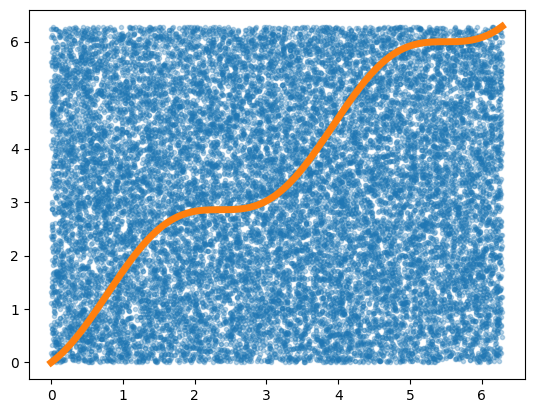

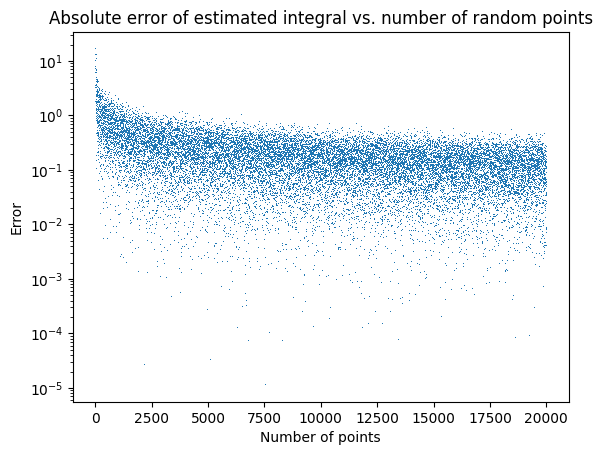

In [3]:
X = np.linspace(0, 2*np.pi, 2000) # Define x-values
ran = max(f(X))-min(f(X)) # Range of y-values
Xs, Ys = None, None

n_rand = 20000 # Upper limit of number of random points

errs = []

act = int_f(2*np.pi)-int_f(0) # Actual value

for nr in range(1,n_rand):
  # Get random points within box
  Xs = np.random.random(nr)*2*np.pi
  Ys = np.random.random(nr)*ran+min(f(X))

  # Add error from these points to the array
  errs.append(abs(len(f(Xs)[f(Xs) >= Ys])/nr*(ran*2*np.pi)-act))

# Plot the function vs. the maximum points
plt.plot(Xs, Ys, '.', alpha=0.3)
plt.plot(X, f(X), linewidth = 5)
plt.show()

# Plot the error vs. number of points
plt.plot(np.arange(1,n_rand), errs, ',')
plt.title("Absolute error of estimated integral vs. number of random points")
plt.ylabel("Error")
plt.xlabel("Number of points")
plt.yscale('log')
plt.show()



The above graphs show: a). the function along with the points used to estimate the integral and b). the absolute error with respect to the number of points used in estimating the integral.

The error clearly decreases significantly as the number of random points increases, but larger numbers of points used to estimate the integral seem to provide diminishing returns past ~2000. At 20k points, the average error seems to be ~0.2, while the average error at 2500 points seems to be ~0.5.

It seems from this that 10k points is sufficient to accurately estimmate non-complex integrals within 0.2 of the actual value.


# **Problem 2: Two-dimensional Ising Model and Curie Temperature**

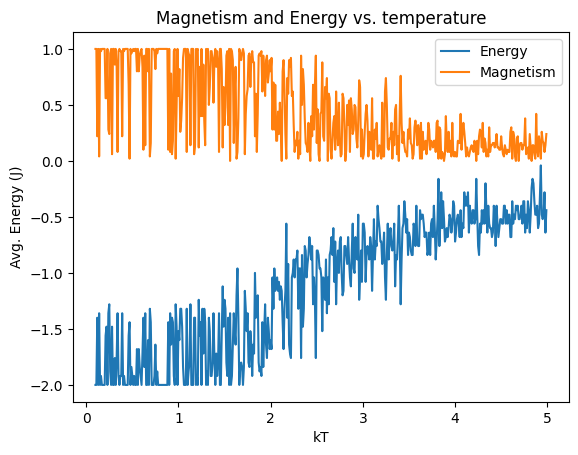

In [41]:
from scipy.optimize import curve_fit

# Find energy contribution of one point, given 2d array of spins and coordinates of point
def energy(s, xi, yi):
  idxs = [s[xi-1,yi],s[xi,yi-1]]
  if(xi == np.shape(s)[0]-1):
    idxs.append(s[0,yi])
  else:
    idxs.append(s[xi+1,yi])
  if(yi == np.shape(s)[1]-1):
    idxs.append(s[xi,0])
  else:
    idxs.append(s[xi,yi+1])
  return -1*s[xi,yi]*sum(idxs)


N = 100  # Number of points
n_iter = 500  # Number of iterations/spin flips
kTs = np.arange(0.1, 5, 0.01) # Temperatures to evaluate at

Ms = []
Es = []
avg_Es = []
avg_Ms = []

# Main Loop
for kT in kTs:
  spins = np.sign(np.random.random((int(np.sqrt(N)),int(np.sqrt(N))))-0.5) # Initialize spins uniformly to -1 or 1
  Es, Ms = [energy(spins, xi, yi) for xi in range(int(np.sqrt(N))) for yi in range(int(np.sqrt(N)))], [abs(np.mean(spins))]

  for n in range(n_iter//N):
    for xi in range(int(np.sqrt(N))):
      for yi in range(int(np.sqrt(N))):
    # xi, yi = np.random.choice(np.arange(int(np.sqrt(N)))), np.random.choice(np.arange(int(np.sqrt(N))))
        E_n = energy(spins, xi, yi)     # Initial energy
        spins[xi,yi] *= -1              # Flip spin to evaluate trial energy
        E_tr = energy(spins, xi, yi)    # Trial energy

        if np.exp(-(E_tr-E_n)/kT) < np.random.random(): # If the probability is less than a random number, don't accept the trial state
          spins[xi,yi] *= -1  # Flip spin again to reject trial state

        Ms.append(abs(np.mean(spins)))
        Es.append(np.mean([energy(spins, xi, yi) for xi in range(int(np.sqrt(N))) for yi in range(int(np.sqrt(N)))])/2)

  avg_Es.append(Es[-1])
  avg_Ms.append(Ms[-1])
  # print(kT, Ms[-1])




plt.plot(kTs, avg_Es, label = "Energy")
plt.plot(kTs, avg_Ms, label = "Magnetism")
plt.xlabel("kT")
plt.ylabel("Avg. Energy (J)")
plt.legend()
plt.title("Magnetism and Energy vs. temperature")
plt.show()



Above is plotted the magnetism and energies at a range of temperatures. This is a bit messy and noisy, so I will plot a line of best fit, using $\tanh$.

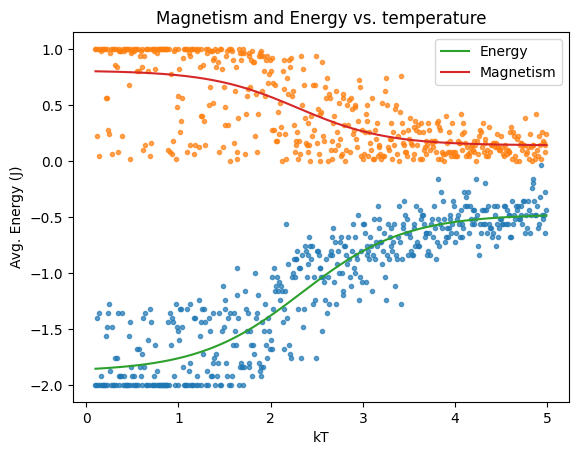

Estimated curie temperature (kT): 2.22


In [42]:
def fit(x, a, b, c, d):
  return a*np.tanh(b*(x-c))+d

plt.plot(kTs, avg_Es, '.', alpha=0.7)
plt.plot(kTs, avg_Ms, '.', alpha=0.7)
a,b,c,d = curve_fit(fit, kTs, avg_Es)[0]
plt.plot(kTs, fit(kTs,a,b,c,d), label = "Energy")
a,b,c,d = curve_fit(fit, kTs, avg_Ms)[0]
plt.plot(kTs, fit(kTs,a,b,c,d), label = "Magnetism")
plt.xlabel("kT")
plt.ylabel("Avg. Energy (J)")
plt.legend()
plt.title("Magnetism and Energy vs. temperature")
plt.show()

print("Estimated curie temperature (kT): {:.2f}".format(kTs[fit(kTs,a,b,c,d) < 0.5][0]))

The estimated Curie temperature comes from finding the kT where the line of best fit for magnetism is 0.5, which should be the approximate inflection point for the $\tanh$ function. In my run above, this was 2.22, which is decent when compared to the analytical solution of 2.27. I'm not sure why my data is so noisy, as I was expecting data more aligned to the graph in the lecture slides, but the trends demonstrated above are consistent with the expected results; the data clearly shifts from all spins aligning at low temperature (which is expected in ferromagnets) to spins being completely random (indicating loss of magnetism) at temperatures above the Curie temperature.